# Input files and data cleaning
First of all, we will designate the input and output directory for the source files. When we download the PubMed articles, the files were downloaded as .txt files. We will convert it into xlsx files for every cancer types.

In [43]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200

In [44]:
# Breast cancer
input_txt_breast_cancer = 'source_files_txt/breast_cancer.txt'
output_xlsx_breast_cancer = 'source_files_xlsx/breast_cancer.xlsx'

# lung cancer
input_txt_lung_cancer = 'source_files_txt/lung_cancer.txt'
output_xlsx_lung_cancer = 'source_files_xlsx/lung_cancer.xlsx'

# Colorectal cancer
input_txt_colorectal_cancer = 'source_files_txt/colorectal_cancer.txt'
output_xlsx_colorectal_cancer = 'source_files_xlsx/colorectal_cancer.xlsx'

# Prostate cancer
input_txt_prostate_cancer = 'source_files_txt/prostate_cancer.txt'
output_xlsx_prostate_cancer = 'source_files_xlsx/prostate_cancer.xlsx'

# Stomach cancer
input_txt_stomach_cancer = 'source_files_txt/stomach_cancer.txt'
output_xlsx_stomach_cancer = 'source_files_xlsx/stomach_cancer.xlsx'

# Liver cancer
input_txt_liver_cancer = 'source_files_txt/liver_cancer.txt'
output_xlsx_liver_cancer = 'source_files_xlsx/liver_cancer.xlsx'

# Cervix cancer
input_txt_cervix_cancer = 'source_files_txt/cervix_cancer.txt'
output_xlsx_cervix_cancer = 'source_files_xlsx/cervix_cancer.xlsx'

# Oesophagus cancer
input_txt_oesophagus_cancer = 'source_files_txt/oesophagus_cancer.txt'
output_xlsx_oesophagus_cancer = 'source_files_xlsx/oesophagus_cancer.xlsx'

# Thyroid cancer
input_txt_thyroid_cancer = 'source_files_txt/thyroid_cancer.txt'
output_xlsx_thyroid_cancer = 'source_files_xlsx/thyroid_cancer.xlsx'

# Bladder cancer
input_txt_bladder_cancer = 'source_files_txt/bladder_cancer.txt'
output_xlsx_bladder_cancer = 'source_files_xlsx/bladder_cancer.xlsx'

input_txt_files = [
    input_txt_breast_cancer, input_txt_lung_cancer, input_txt_colorectal_cancer, input_txt_prostate_cancer,
    input_txt_stomach_cancer, input_txt_liver_cancer, input_txt_cervix_cancer, input_txt_oesophagus_cancer,
    input_txt_thyroid_cancer, input_txt_bladder_cancer
]

output_xlsx_files = [
    output_xlsx_breast_cancer, output_xlsx_lung_cancer, output_xlsx_colorectal_cancer, output_xlsx_prostate_cancer,
    output_xlsx_stomach_cancer, output_xlsx_liver_cancer, output_xlsx_cervix_cancer, output_xlsx_oesophagus_cancer,
    output_xlsx_thyroid_cancer, output_xlsx_bladder_cancer
]

In [45]:
PMID_index_list_of_list = []
lines_array = []

for input_file in input_txt_files:
    PMID_index_list = []
    with open(input_file, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    lines_array.append(lines)
    
    article_count = 0
    index = 0
    
    for line in lines:
        if line.startswith('PMID'):
            PMID_index_list.append(index)
            article_count += 1
        index +=1
    PMID_index_list.append(index)
    PMID_index_list_of_list.append(PMID_index_list)
    
    print(input_file)
    print(f"the number of articles in {input_file} is {article_count}\n")

source_files_txt/breast_cancer.txt
the number of articles in source_files_txt/breast_cancer.txt is 10000

source_files_txt/lung_cancer.txt
the number of articles in source_files_txt/lung_cancer.txt is 10000

source_files_txt/colorectal_cancer.txt
the number of articles in source_files_txt/colorectal_cancer.txt is 10000

source_files_txt/prostate_cancer.txt
the number of articles in source_files_txt/prostate_cancer.txt is 10000

source_files_txt/stomach_cancer.txt
the number of articles in source_files_txt/stomach_cancer.txt is 10000

source_files_txt/liver_cancer.txt
the number of articles in source_files_txt/liver_cancer.txt is 10000

source_files_txt/cervix_cancer.txt
the number of articles in source_files_txt/cervix_cancer.txt is 10000

source_files_txt/oesophagus_cancer.txt
the number of articles in source_files_txt/oesophagus_cancer.txt is 10000

source_files_txt/thyroid_cancer.txt
the number of articles in source_files_txt/thyroid_cancer.txt is 10000

source_files_txt/bladder_can

In [46]:
articles_list_of_list = []
for one_cancer_type in range(len(PMID_index_list_of_list)):
    articles_list = []
    for i in range(article_count):
        for one_line in range(PMID_index_list_of_list[one_cancer_type][i], PMID_index_list_of_list[one_cancer_type][i+1]):
            articles_list.append(lines_array[one_cancer_type][one_line])
    articles_list_of_list.append(articles_list)

In [47]:
PMID_list_of_list = []
TI_list_of_list = []
AB_list_of_list = []

for one_articles_list in articles_list_of_list:
    current_line = 0
    PMID_list = []
    AB_list = []
    TI_list = []
    while current_line < len(one_articles_list):
        if one_articles_list[current_line].startswith('PMID'):
            PMID = one_articles_list[current_line].split('- ')
            PMID_list.append(PMID[1].strip())
            current_line += 1
        elif one_articles_list[current_line].startswith('TI'):
            TI = one_articles_list[current_line][6:-1].strip()
            while one_articles_list[current_line+1].startswith('    '):
                next_line = one_articles_list[current_line+1].strip()
                TI = TI + ' ' + next_line
                current_line += 1
            TI_list.append(TI)
        elif one_articles_list[current_line].startswith('AB'):
            AB = one_articles_list[current_line][6:-1].strip()
            while one_articles_list[current_line+1].startswith('    '):
                next_line = one_articles_list[current_line+1].strip()
                AB = AB + ' ' + next_line
                current_line += 1
            AB_list.append(AB)
        current_line += 1
    
    PMID_list_of_list.append(PMID_list)
    TI_list_of_list.append(TI_list)
    AB_list_of_list.append(AB_list)

In [48]:
import pandas as pd
from itertools import zip_longest

cancer_types = ["Breast", "Lung", "Colorectal", "Prostate", "Stomach", "Liver", "Cervix", "Oesophagus", "Thyroid", "Bladder"]

for i in range(len(cancer_types)):
    pmid_list = PMID_list_of_list[i]
    ti_list = TI_list_of_list[i]
    ab_list = AB_list_of_list[i]
    
    zipped_data = list(zip_longest(pmid_list, ti_list, ab_list, fillvalue=None))
    
    pmid_list, ti_list, ab_list = zip(*zipped_data)

    data = {
        'PMID': pmid_list,
        'TI': ti_list,
        'AB': ab_list,
        'Type': [cancer_types[i]] * len(pmid_list)
    }
    df = pd.DataFrame(data)

    df.to_excel(output_xlsx_files[i], index=False)
    print(f"Saved data for {cancer_types[i]} cancer to {output_xlsx_files[i]}")

Saved data for Breast cancer to source_files_xlsx/breast_cancer.xlsx
Saved data for Lung cancer to source_files_xlsx/lung_cancer.xlsx
Saved data for Colorectal cancer to source_files_xlsx/colorectal_cancer.xlsx
Saved data for Prostate cancer to source_files_xlsx/prostate_cancer.xlsx
Saved data for Stomach cancer to source_files_xlsx/stomach_cancer.xlsx
Saved data for Liver cancer to source_files_xlsx/liver_cancer.xlsx
Saved data for Cervix cancer to source_files_xlsx/cervix_cancer.xlsx
Saved data for Oesophagus cancer to source_files_xlsx/oesophagus_cancer.xlsx
Saved data for Thyroid cancer to source_files_xlsx/thyroid_cancer.xlsx
Saved data for Bladder cancer to source_files_xlsx/bladder_cancer.xlsx


# Tokenization
Here, we start to convert sequence of texts into tokens. We start with a dictionary with cancer types as the keys. Then, we will create Token Distribution plot figures using matplotlib and save it in a separate folder.

In [49]:
tokens_by_type = {}

dataframes = []

for file_path in output_xlsx_files:
    df = pd.read_excel(file_path, index_col=None)
    dataframes.append(df)

for i in range(len(dataframes)):
    dataframes[i]["TI_AB"] = dataframes[i]["TI"].astype(str) + dataframes[i]["AB"].astype(str)

for i in range(len(dataframes)):
    cancer_type = dataframes[i]['Type'].unique()[0]
    tokens_by_type[cancer_type] = [article.split() for article in dataframes[i]['TI_AB']]

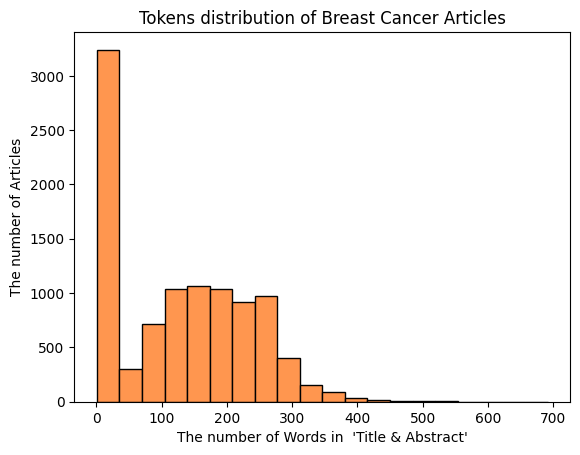

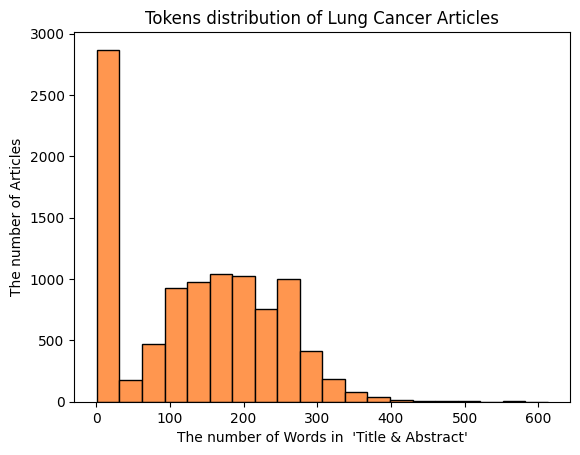

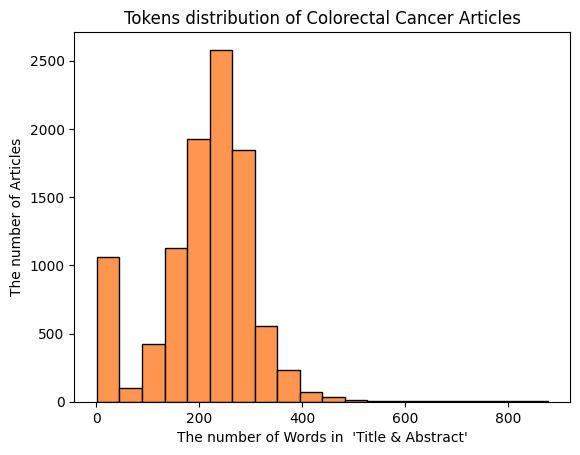

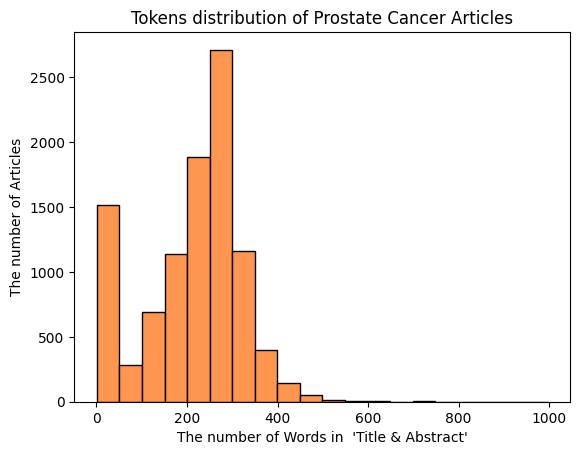

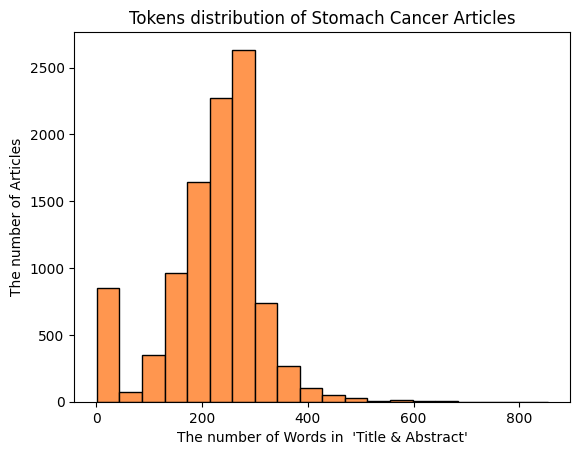

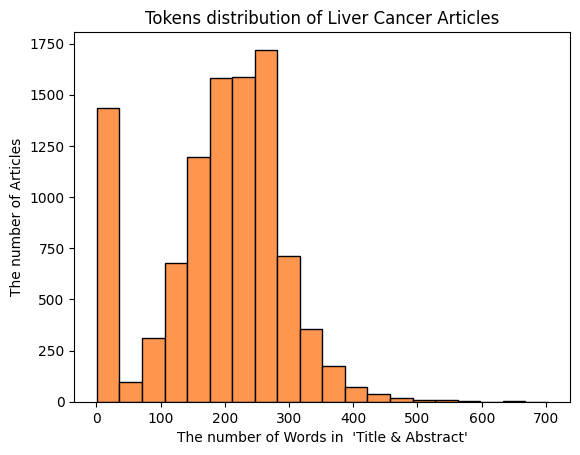

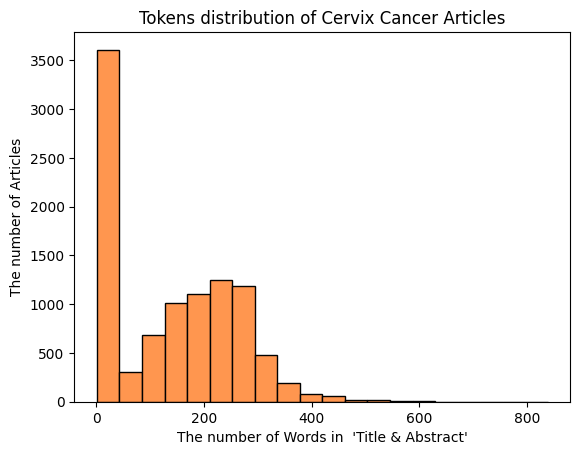

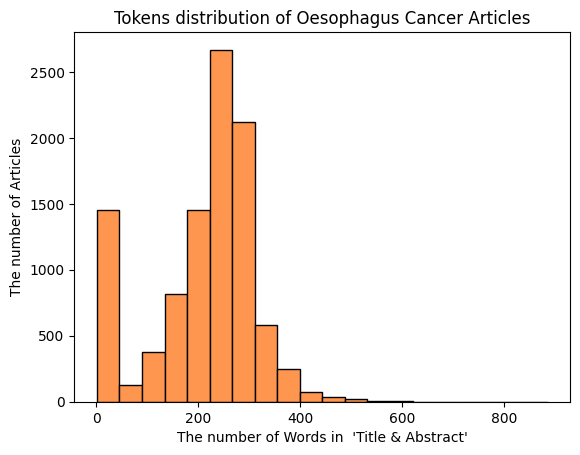

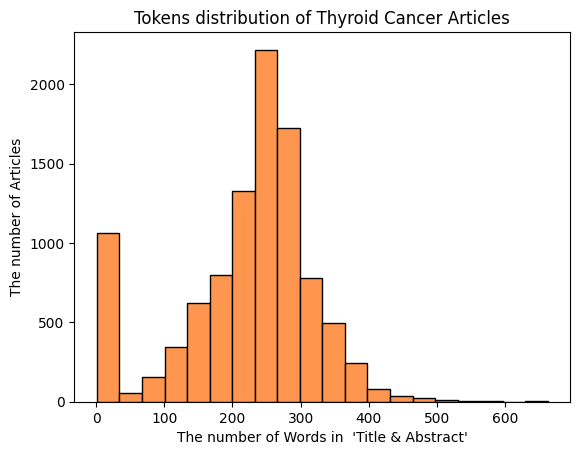

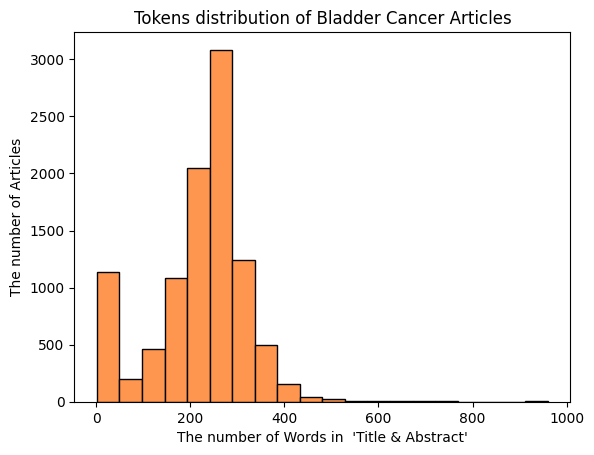

In [50]:
# HISTOGRAM

import matplotlib.pyplot as plt

for cancer_type in tokens_by_type.keys():
    tokens_distribution = [len(token) for token in tokens_by_type[cancer_type]]

    plt.hist(tokens_distribution, bins = 20, color = 'xkcd:pastel orange', edgecolor = 'black')
    plt.title(f"Tokens distribution of {cancer_type} Cancer Articles")
    plt.xlabel("The number of Words in  'Title & Abstract'")
    plt.ylabel("The number of Articles")

    plt.savefig(f'./figures/{cancer_type}_number_of_tokens_TI_AB.png')
    plt.show()

based on the cancer type, we filter the token. We created 2 versions. The first one combines all tokens in all cancer types, while the 2nd one combines all tokens for each cancer type. The same one goes for subsequent cells (lower, stopwords, and lemmatization)

In [51]:
import re

filtered_tokens = []

for cancer_type in tokens_by_type.keys():
    filtered_tokens += list(filter(None, [re.sub(r'[^A-Za-z]', '', word) for token in tokens_by_type[cancer_type] for word in token]))

filtered_tokens_by_type = {}

for cancer_type in tokens_by_type.keys():
    filtered_tokens_by_type[cancer_type] = list(filter(None, [re.sub(r'[^A-Za-z]', '', word) for token in tokens_by_type[cancer_type] for word in token]))

In [52]:
import nltk

stopwords = nltk.corpus.stopwords.words('English')

filtered_tokens_lower = [token.lower() for token in filtered_tokens]
filtered_tokens_nostopwords = [token for token in filtered_tokens_lower if token not in stopwords]


filtered_tokens_by_type_lower = {}
filtered_tokens_by_type_nostopwords = {}

for cancer_type in filtered_tokens_by_type.keys():

    filtered_tokens_by_type_lower[cancer_type] = [token.lower() for token in filtered_tokens_by_type[cancer_type]]
    filtered_tokens_by_type_nostopwords[cancer_type] = [token for token in filtered_tokens_by_type_lower[cancer_type] if token not in stopwords]

In [53]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

tokens_lemmatized = [lemmatizer.lemmatize(token) for token in filtered_tokens_nostopwords]

tokens_lemmatized_by_type = {}

for cancer_type in filtered_tokens_by_type_nostopwords.keys():
    tokens_lemmatized_by_type[cancer_type] = [lemmatizer.lemmatize(token) for token in filtered_tokens_by_type_nostopwords[cancer_type]]

In [54]:
# WARNING ZONE ⬇️

In [55]:
merged_df = pd.concat(dataframes)

In [88]:
merged_df['Type'].head

<bound method NDFrame.head of 0        Breast
1        Breast
2        Breast
3        Breast
4        Breast
         ...   
9995    Bladder
9996    Bladder
9997    Bladder
9998    Bladder
9999    Bladder
Name: Type, Length: 100000, dtype: object>

In [56]:
de_articles = merged_df['TI_AB'].tolist()

In [57]:
#playground

wpt = nltk.WordPunctTokenizer()
# stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens_wpt = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens_wpt = [token for token in tokens_wpt if token not in stopwords]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens_wpt)
    return doc

normalize_articles = np.vectorize(normalize_document)

In [87]:
de_normalized_articles = normalize_articles(de_articles)
de_normalized_articles

array(['breast cancer biology biomarkers treatmentsduring past recent years various therapies emerged era breast cancer breast cancer heterogeneous disease genetic environmental factors involved breast cancer stem cells bcscs main player aggressiveness different tumors also cells main challenge cancer treatment moreover major obstacle achieve effective treatment resistance therapies various types treatment breast cancer bc patients therefore review present current treatments novel approaches antibodydrug conjugation systems adcs nanoparticles albumin metal lipid polymer micellebased nanoparticles bcscsbased therapies furthermore prognostic predictive biomarkers discussed also biomarkers applied tests oncotype dx mamm print upapai regarded suitable prognostic predictive factors breast cancer',
       'breast cancer presentation investigation managementbreast cancer common global malignancy leading cause cancer deaths despite undergraduate postgraduate exposure breast cancer limited impa

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(de_normalized_articles)
print(cv_matrix.shape)
cv_matrix

(100000, 195219)


<100000x195219 sparse matrix of type '<class 'numpy.int64'>'
	with 8033464 stored elements in Compressed Sparse Row format>

In [82]:
# view dense representation 
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [81]:
cv = CountVectorizer(max_features=10000, min_df=0.01, max_df=0.95)
cv_matrix = cv.fit_transform(de_normalized_articles)
print(cv_matrix.shape)
cv_matrix

(100000, 1493)


<100000x1493 sparse matrix of type '<class 'numpy.int64'>'
	with 5595708 stored elements in Compressed Sparse Row format>

In [84]:
# get all unique words in the corpus
vocab = cv.get_feature_names_out()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,abdominal,ability,ablation,able,abnormal,absence,absolute,access,according,account,...,worldwide,worse,would,xenograft,year,yearold,years,yet,young,younger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
print(len(vocab))
vocab
# ivan yang run ini

1493


array(['abdominal', 'ability', 'ablation', ..., 'yet', 'young', 'younger'],
      dtype=object)

In [86]:
import pandas as pd

# create a sample dataframe with a categorical column 'size'
df = pd.DataFrame({'size': ['small', 'medium', 'large', 'small', 'large']})

# define the ordering of the categories
size_order = ['small', 'medium', 'large']

# convert the 'size' column to ordered integer codes
df['size_code'] = pd.Categorical(df['size'], categories=size_order, ordered=True).codes

print(df)


     size  size_code
0   small          0
1  medium          1
2   large          2
3   small          0
4   large          2


In [89]:
#
#Ch05b - Text Classification - I
#
#corpus, target_labels, target_names = (data.data, data.target, 
#                                       [data_labels_map[label] for label in data.target])
#data_df = pd.DataFrame({'Article': corpus, 'Target Label': target_labels, 'Target Name': target_names})
#print(data_df.shape)
#data_df.head(10)
#corpus, target_labels, target_names = (PubMed_Articles['AB'], [ClassIDMap[label] for label in PubMed_Articles['Type']], PubMed_Articles['Type'])
#data_df = pd.DataFrame({'Article': corpus, 'Target Label': target_labels, 'Target Name': target_names})

corpus, target_names = (merged_df['TI_AB'],  merged_df['Type'])

data_df = pd.DataFrame({'Article': corpus, 'Class': target_names})

print(data_df.shape)
data_df.head(10)

(100000, 2)


,Article,Class
0,"Breast cancer: Biology, biomarkers, and treatments.During the past recent years, various therapies emerged in the era of breast cancer. Breast cancer is a heterogeneous disease in which genetic an...",Breast
1,"Breast cancer: presentation, investigation and management.Breast cancer is the most common global malignancy and the leading cause of cancer deaths. Despite this, undergraduate and postgraduate ex...",Breast
2,"Awareness and current knowledge of breast cancer.Breast cancer remains a worldwide public health dilemma and is currently the most common tumour in the globe. Awareness of breast cancer, public at...",Breast
3,Review of Breast Cancer Pathologigcal Image Processing.Breast cancer is one of the most common malignancies. Pathological image processing of breast has become an important means for early diagnos...,Breast
4,Primary and secondary prevention of breast cancer.INTRODUCTION: Breast cancer is the most common cancer among women and is the second cancer frequently occurring worldwide of newly-diagnosed cance...,Breast
5,"The Role of Progesterone Receptors in Breast Cancer.The progesterone receptor (PR) modulates estrogen receptors α (ERα) action in breast cancer; it is an upregulated target gene of ER, and its exp...",Breast
6,"Breast cancer.Breast cancer remains a public-health issue on a global scale. We report new information about the disease from the past 5 years. Early age at first birth, increasing parity, and tam...",Breast
7,Treatment of breast cancer.Understanding breast cancer treatment options can help family physicians care for their patients during and after cancer treatment. This article reviews typical treatmen...,Breast
8,"Breast cancer in young women: an overview.Despite dramatic advances in cancer research setting, breast cancer remains a major health problem and represents currently a top biomedical research prio...",Breast
9,Breast cancer in the 21st century: from early detection to new therapies.The analysis of the causes that have given rise to a change in tendency in the incidence and mortality rates of breast canc...,Breast


In [90]:
total_nulls = data_df[data_df.Article.str.strip() == ''].shape[0]
print("Empty documents:", total_nulls)

Empty documents: 0


In [91]:
data_df = data_df[~(data_df.Article.str.strip() == '')]
data_df.shape

(100000, 2)

In [94]:
import text_normalizer as tn
import nltk

stopword_list = nltk.corpus.stopwords.words('english')
# just to keep negation if any in bi-grams
stopword_list.remove('no')
stopword_list.remove('not')
#stopword_list.add('cancer')

# normalize our corpus
norm_corpus = tn.normalize_corpus(corpus=data_df['Article'], html_stripping=False, contraction_expansion=True, 
                                  accented_char_removal=True, text_lower_case=True, text_lemmatization=True, 
                                  text_stemming=False, special_char_removal=True, remove_digits=True,
                                  stopword_removal=True, stopwords=stopword_list)
data_df['Clean Article'] = norm_corpus

AttributeError: module 'text_normalizer' has no attribute 'normalize_corpus'

In [ ]:
data_df = data_df[['Article', 'Clean Article', 'Class']]
data_df.head(10)

In [ ]:
data_df = data_df.replace(r'^(\s?)+$', np.nan, regex=True)
data_df.info()

In [ ]:
data_df = data_df.dropna().reset_index(drop=True)
data_df.info()

In [ ]:
#data_df.to_csv('clean_newsgroups.csv', index=False)

data_df.to_csv(OutputFileLocation, encoding='utf-8',index=False)

In [ ]:
#data_df = pd.read_csv('clean_newsgroups.csv')
data_df = pd.read_csv(OutputFileLocation, encoding='utf-8')

In [ ]:
np.array(data_df['Clean Article'])

In [ ]:
 np.array(data_df['Class'])

In [ ]:
# DOUBLE WARNING ZONE ZONE ⬇️⬇️

In [ ]:
from sklearn.model_selection import train_test_split
'''
train_corpus, test_corpus, train_label_nums, test_label_nums, train_label_names, test_label_names =\
                                 train_test_split(np.array(data_df['Clean Article']), np.array(data_df['Target Label']),
                                                       np.array(data_df['Class']), test_size=0.33, random_state=42)
'''
train_corpus, test_corpus,  train_label_names, test_label_names =\
                                 train_test_split(np.array(data_df['Clean Article']),
                                                       np.array(data_df['Class']), test_size=0.33, random_state=42)
train_corpus.shape, test_corpus.shape

In [ ]:
train_corpus

In [ ]:
train_label_names

In [ ]:
train_label_names, test_label_names

In [ ]:
from collections import Counter

trd = dict(Counter(train_label_names))
tsd = dict(Counter(test_label_names))

(pd.DataFrame([[key, trd[key], tsd[key]] for key in trd], 
             columns=['Class', 'Train Count', 'Test Count'])
.sort_values(by=['Train Count', 'Test Count'],
             ascending=False))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

# build BOW features on train articles
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0)
cv_train_features = cv.fit_transform(train_corpus)

In [ ]:
print(cv_train_features.shape)

In [ ]:
print(cv_train_features)

In [ ]:
# transform test articles into features
cv_test_features = cv.transform(test_corpus)
print(cv_test_features.shape)
print(cv_train_features)

In [ ]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10, random_state=42)
gbc.fit(cv_train_features, train_label_names)
gbc_bow_cv_scores = cross_val_score(gbc, cv_train_features, train_label_names, cv=5)
gbc_bow_cv_mean_score = np.mean(gbc_bow_cv_scores)
print('CV Accuracy (5-fold):', gbc_bow_cv_scores)
print('Mean CV Accuracy:', gbc_bow_cv_mean_score)
gbc_bow_test_score = gbc.score(cv_test_features, test_label_names)
print('Test Accuracy:', gbc_bow_test_score)

## UNTUK COMPARISON JAYA JAYA JAYA!!!

In [ ]:
pd.DataFrame([['Naive Bayes', mnb_bow_cv_mean_score, mnb_bow_test_score],
              ['Logistic Regression', lr_bow_cv_mean_score, lr_bow_test_score],
              ['Linear SVM', svm_bow_cv_mean_score, svm_bow_test_score],
              ['Linear SVM (SGD)', svmsgd_bow_cv_mean_score, svmsgd_bow_test_score],
              ['Random Forest', rfc_bow_cv_mean_score, rfc_bow_test_score],
              ['Gradient Boosted Machines', gbc_bow_cv_mean_score, gbc_bow_test_score]],
             columns=['Model', 'CV Score (TF)', 'Test Score (TF)'],
             )

In [ ]:
pd.DataFrame([['Naive Bayes', mnb_bow_cv_mean_score, mnb_bow_test_score],
              ['Logistic Regression', lr_bow_cv_mean_score, lr_bow_test_score],
              ['Linear SVM', svm_bow_cv_mean_score, svm_bow_test_score],
              ['Linear SVM (SGD)', svmsgd_bow_cv_mean_score, svmsgd_bow_test_score],
              ['Random Forest', rfc_bow_cv_mean_score, rfc_bow_test_score],
              ['Gradient Boosted Machines', gbc_bow_cv_mean_score, gbc_bow_test_score]],
             columns=['Model', 'CV Score (TF)', 'Test Score (TF)'],
             ).T

-----

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# build BOW features on train articles
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
tv_train_features = tv.fit_transform(train_corpus)

In [ ]:
# transform test articles into features
tv_test_features = tv.transform(test_corpus)

In [ ]:
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# build BOW features on train articles
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
tv_train_features = tv.fit_transform(train_corpus)
# transform test articles into features
tv_test_features = tv.transform(test_corpus)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)